# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013
5,WESTERN MISSOURI MEDICAL CENTER,260097,MO,READM-30-HIP-KNEE-HRRP,141,NaN,1.5189,8.1,5.3,19.0,07/01/2010,06/30/2013
6,SAINT AGNES HOSPITAL,210011,MD,READM-30-HIP-KNEE-HRRP,390,NaN,1.5079,7.8,5.2,38.0,07/01/2010,06/30/2013
7,MERCY HOSPITAL JEFFERSON,260023,MO,READM-30-HIP-KNEE-HRRP,178,NaN,1.5019,9.2,6.1,24.0,07/01/2010,06/30/2013
8,ONSLOW MEMORIAL HOSPITAL,340042,NC,READM-30-HIP-KNEE-HRRP,98,NaN,1.4953,7.9,5.3,15.0,07/01/2010,06/30/2013
9,FAUQUIER HOSPITAL,490023,VA,READM-30-HIP-KNEE-HRRP,256,NaN,1.4844,7.4,5.0,26.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

E:\anaconda\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


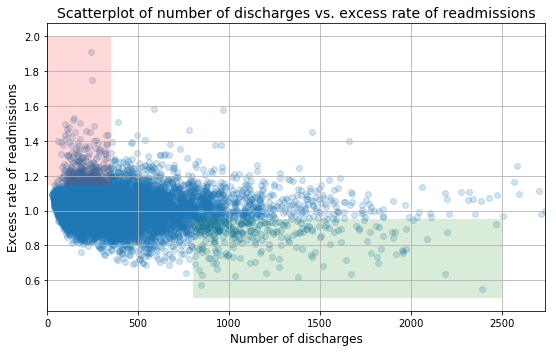

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [85]:
# Your turn
hospital_read_df.columns

Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

## The main concerns:
The main concerns of the preliminary report above was to check if the:  

- there is correlation between hospital capacity (number of discharges) and readmission rates;

## Background: 
The pogram penalised medicare reimbursement to hospitals with high readmission rate for some common diseases for better quality treatment.
Readmission: as an admission to a subsection (d) hospital within 30 days of a discharge from the same or another subsection (d) hospital.

$$Excess-readmissions = \frac{predicted}{expected}$$
predicted: hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia.  
expected: the expected number based on an average hospital with similar patients.  
excess readmissions: > 1;

## Cleaning up data
We first clean up the data by removing 'not availble' and 'na' in both 'Number of Discharges' and 'Excess Readmission Ratio' columns.

In [106]:
discharge_na = sum(hospital_read_df['Number of Discharges'] != 'Not Available') / len(hospital_read_df['Number of Discharges'] != 'Not Available')
Predicted_na = sum(hospital_read_df['Predicted Readmission Rate'].isnull()) / len(hospital_read_df['Predicted Readmission Rate'].isnull())
Expected_na = sum(hospital_read_df['Expected Readmission Rate'].isnull()) / len(hospital_read_df['Expected Readmission Rate'].isnull())
print("the percentage of NA in discharge is", discharge_na, "\n",  
      "the percentage of NA in predicted readmission rate is", Predicted_na, "\n",
     "the percentage of expected readmission rate is", Expected_na, "\n")

the percentage of NA in discharge is 0.686714116251 
 the percentage of NA in predicted readmission rate is 0.185587188612 
 the percentage of expected readmission rate is 0.185587188612 



In [108]:
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
excess_discharge = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']].dropna(axis=0, how='any')

In [142]:
sum(np.log(clean_hospital_read_df['Number of Discharges'].astype(float)) < -100000000000)

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


81

Total there are 16860 rows in 'hospital_read_df', and there are 11578 rows in 'clean_hospital_read_df', which has removed 'Not Available' in 'Number of Discharges' column; Among There are 81 cases of 0 discharge, but luckily, when we remove na in 'Excess Readmission Ratio', we removed all the 0, which can also mean no treatment is given in hospital. Finally there are 11497 in 'excess_discharge' (the dataset we will use) after removing all the na. 

## Re-plotting scatter plots:
We will also include the log scale in case there might be stronger visual correlation in a different scale.

In [112]:
import numpy as np
excess_discharge['log Number of Discharges'] = np.log(excess_discharge['Number of Discharges'].astype(float))
excess_discharge['log Excess Readmission Ratio'] = np.log(excess_discharge['Excess Readmission Ratio'].astype(float))
# excess_discharge has 11497 now

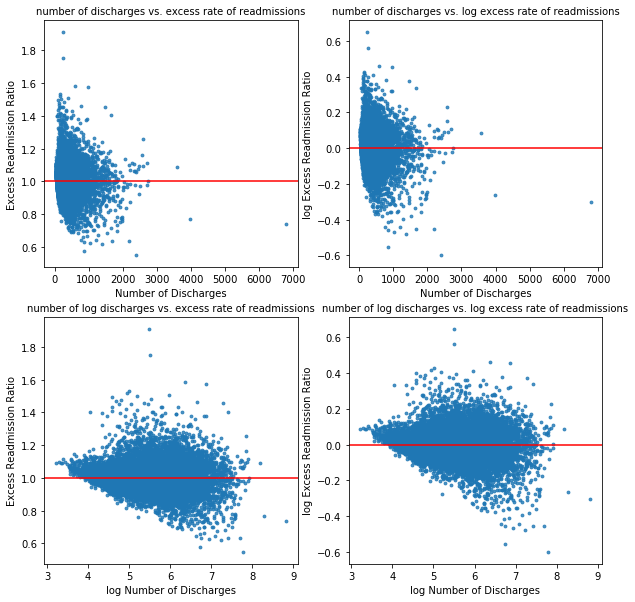

In [196]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.scatter(excess_discharge['Number of Discharges'],excess_discharge['Excess Readmission Ratio'],s=8, alpha = 0.8)
plt.axhline(y=1, color='r', linestyle='-')
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('number of discharges vs. excess rate of readmissions', fontsize=10)

plt.subplot(222)
plt.scatter(excess_discharge['Number of Discharges'],excess_discharge['log Excess Readmission Ratio'],s=8, alpha = 0.8)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Number of Discharges')
plt.ylabel('log Excess Readmission Ratio')
plt.title('number of discharges vs. log excess rate of readmissions', fontsize=10)

plt.subplot(223)
plt.scatter(excess_discharge['log Number of Discharges'],excess_discharge['Excess Readmission Ratio'],s=8, alpha = 0.8)
plt.axhline(y=1, color='r', linestyle='-')
plt.xlabel('log Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('number of log discharges vs. excess rate of readmissions', fontsize=10)

plt.subplot(224)
plt.scatter(excess_discharge['log Number of Discharges'],excess_discharge['log Excess Readmission Ratio'],s=8, alpha = 0.8)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('log Number of Discharges')
plt.ylabel('log Excess Readmission Ratio')
plt.title('number of log discharges vs. log excess rate of readmissions', fontsize=10)
plt.show()

By graphical analysis, there is slight correlation at all between the discharge and excess readminssion rate.

## Hypothesis Testing on correlation between discharge and Readmission rate

We can conduct t-test for testing the population correlation coefficient:
$H_0: ρ = 0$ vs $H_1: ρ \neq 0$. If the sample size is large enough, which it is, the sampling distribution of r is symmetric when ρ = 0.
The test statistics is:
$$t^* = \frac{r\sqrt{n-2}}{\sqrt{1-r^2}}$$

In [206]:
excess_discharge['Number of Discharges'] = excess_discharge['Number of Discharges'].astype(float)
excess_discharge.corr(method='pearson')

,Number of Discharges,Excess Readmission Ratio,log Number of Discharges,log Excess Readmission Ratio
Number of Discharges,1.000000,-0.097398,0.872214,-0.114193
Excess Readmission Ratio,-0.097398,1.000000,-0.097670,0.995254
log Number of Discharges,0.872214,-0.097670,1.000000,-0.114003
log Excess Readmission Ratio,-0.114193,0.995254,-0.114003,1.000000


The correlation is -0.097398, roughly 10%.

In [214]:
df = len(excess_discharge) - 2  # degrees of freedom;
t = -0.097398 * df**(1/2) / (1-0.097398**2)**(1/2)

In [218]:
from scipy import stats
pval = stats.t.sf(np.abs(t), df)*2

In [219]:
pval

1.2224686234119185e-25

We reject the null hypothesis and conclude that there is a correlation between discharge and excess readminssion rate. 

We can reassure our result is correct then we use a linear model and test it on beta:

In [237]:
import statsmodels.api as sm
X = excess_discharge['Number of Discharges']
X = sm.add_constant(X)
y = excess_discharge['Excess Readmission Ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                               OLS Regression Results                               
Dep. Variable:     Excess Readmission Ratio   R-squared:                       0.009
Model:                                  OLS   Adj. R-squared:                  0.009
Method:                       Least Squares   F-statistic:                     110.1
Date:                      Wed, 19 Jul 2017   Prob (F-statistic):           1.22e-25
Time:                              21:02:48   Log-Likelihood:                 11178.
No. Observations:                     11497   AIC:                        -2.235e+04
Df Residuals:                         11495   BIC:                        -2.234e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

It seems that the result is still the same, we reject the null hypothesis and conclude there is a correlation between discharges and excess readmission.

### statistical significance and practical significance
We have seen that the model has shown significance of the difference. But in terms of practical significant, the beta for discharge is -2.901e-05, which means that increasing 1000 in discharge only gives 0.03 decrease in excess rate of readmission on average. We might have strong statistical significance due to large size of data, but in terms of practicality, it might be hard to place discriminative treatments on small size hospitals. 

## Conclusions:
I agree with the preliminary analysis that there is a significant correlation between hospital capacity and readmission rates, but I disagree and conclude that there is no practical significance.

Scatter plot has the advantage of showing every single observation, which shows us the general picture, also we can clearly see the variance of readmission, and there might be some correlation between the variance of readmission and discharge, but the data is relatively sparse for big hospitals.
The disadvantage of scatter plot is that when there are lots of data, they tend to concentrate, which reduces the visibility of data points. 
For the scatter plot above, the purpose of highlighting the areas in red and green is unclear. We can use bar plot to convey the same message.

In [248]:
thres_1 = (excess_discharge['Number of Discharges'] < 100) 
thres_2 = (excess_discharge['Number of Discharges'] > 100) & (excess_discharge['Number of Discharges'] < 300)
thres_3 = (excess_discharge['Number of Discharges'] > 300) & (excess_discharge['Number of Discharges'] < 500)
thres_4 = (excess_discharge['Number of Discharges'] > 500) & (excess_discharge['Number of Discharges'] < 1000)
thres_5 = (excess_discharge['Number of Discharges'] > 1000) & (excess_discharge['Number of Discharges'] < 2000)
thres_6 = (excess_discharge['Number of Discharges'] > 2000) 

In [268]:
import numpy as np
t = [50, 200, 400, 750,1500,2300]
mean_t1 = np.mean(y[thres_1])
mean_t2 = np.mean(y[thres_2])
mean_t3 = np.mean(y[thres_3])
mean_t4 = np.mean(y[thres_4])
mean_t5 = np.mean(y[thres_5])
mean_t6 = np.mean(y[thres_6])
mean_readmission = [mean_t1 - 0.8,mean_t2- 0.8,mean_t3- 0.8,mean_t4- 0.8,mean_t5- 0.8,mean_t6- 0.8]

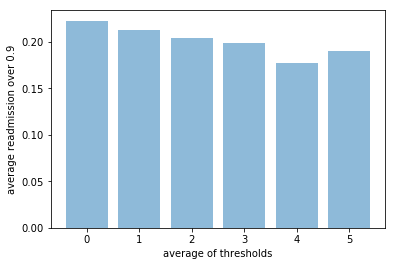

In [270]:
plt.bar(range(0,6), mean_readmission, alpha=0.5)
plt.ylabel('average readmission over 0.9')
plt.xlabel('average of thresholds')
plt.show()

In [258]:
mean_t3

1.0041554707379166

## Recommendations:
In terms of practicality concern, I do not recommend policy makers to treat small size hospitals differently from large size hospitals for such as asking them to further upgrade their equipments and resource allocation, as this could be reverse causality, in which lack of resources affect the quality negatively. Further investigations are needed into their operations. We will recommend that all hospitals should be receive the same regulatory treatments when readmission rates are above the threshold.